In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Define the search space based on the provided table
inventory = {
    "top": [
        {"name": "T-shirt", "price": 0.0, "dress_code": "Casual", "color": "Bright", "comfort_level": 5},
        {"name": "Formal Shirt", "price": 120.0, "dress_code": "Business", "color": "Dark", "comfort_level": 3},
        {"name": "Polo Shirt", "price": 80.0, "dress_code": "Sportswear", "color": "Bright", "comfort_level": 4},
        {"name": "Hoodie", "price": 60.0, "dress_code": "Casual", "color": "Bright", "comfort_level": 4},
        {"name": "Evening Blouse", "price": 150.0, "dress_code": "Evening", "color": "Dark", "comfort_level": 3},
        {"name": "Sweater", "price": 0.0, "dress_code": "Casual", "color": "Dark", "comfort_level": 5},
        {"name": "Tank Top", "price": 0.0, "dress_code": "Sportswear", "color": "Bright", "comfort_level": 4},
        {"name": "Silk Blouse", "price": 200.0, "dress_code": "Evening", "color": "Dark", "comfort_level": 3},
    ],
    "bottom": [
        {"name": "Jeans", "price": 0.0, "dress_code": "Casual", "color": "Dark", "comfort_level": 4},
        {"name": "Formal Trousers", "price": 150.0, "dress_code": "Business", "color": "Dark", "comfort_level": 3},
        {"name": "Skirt", "price": 100.0, "dress_code": "Evening", "color": "Bright", "comfort_level": 3},
        {"name": "Sports Shorts", "price": 0.0, "dress_code": "Sportswear", "color": "Bright", "comfort_level": 5},
        {"name": "Chinos", "price": 90.0, "dress_code": "Business", "color": "Dark", "comfort_level": 4},
        {"name": "Leggings", "price": 60.0, "dress_code": "Casual", "color": "Dark", "comfort_level": 5},
        {"name": "Athletic Pants", "price": 80.0, "dress_code": "Sportswear", "color": "Bright", "comfort_level": 5},
        {"name": "Evening Gown", "price": 250.0, "dress_code": "Evening", "color": "Dark", "comfort_level": 1}
    ],
    "shoes": [
        {"name": "Sneakers", "price": 0.0, "dress_code": "Sportswear", "color": "Bright", "comfort_level": 5},
        {"name": "Leather Shoes", "price": 180.0, "dress_code": "Business", "color": "Dark", "comfort_level": 2},
        {"name": "Running Shoes", "price": 120.0, "dress_code": "Sportswear", "color": "Bright", "comfort_level": 5},
        {"name": "Ballet Flats", "price": 90.0, "dress_code": "Casual", "color": "Dark", "comfort_level": 4},
        {"name": "High Heels", "price": 250.0, "dress_code": "Evening", "color": "Dark", "comfort_level": 2},
        {"name": "Sandals", "price": 0.0, "dress_code": "Casual", "color": "Bright", "comfort_level": 5},
        {"name": "Loafers", "price": 150.0, "dress_code": "Business", "color": "Dark", "comfort_level": 3},
        {"name": "Evening Pumps", "price": 220.0, "dress_code": "Evening", "color": "Bright", "comfort_level": 2}
    ],
    "neck": [
        {"name": "Silk Scarf", "price": 70.0, "dress_code": "Business", "color": "Dark", "comfort_level": 3},
        {"name": "Sports Scarf", "price": 0.0, "dress_code": "Sportswear", "color": "Bright", "comfort_level": 4},
        {"name": "Necklace", "price": 220.0, "dress_code": "Evening", "color": "Dark", "comfort_level": 3},
        {"name": "Casual Scarf", "price": 0.0, "dress_code": "Casual", "color": "Bright", "comfort_level": 5},
        {"name": "Bow Tie", "price": 80.0, "dress_code": "Evening", "color": "Dark", "comfort_level": 3},
        {"name": "Athletic Headband", "price": 50.0, "dress_code": "Sportswear", "color": "Bright", "comfort_level": 5},
        {"name": "Diamond Necklace", "price": 750.0, "dress_code": "Evening", "color": "Bright", "comfort_level": 3},
        {"name": "Choker", "price": 0.0, "dress_code": "Evening", "color": "Dark", "comfort_level": 4}
    ],
    "purse": [
        {"name": "Clutch Bag", "price": 100.0, "dress_code": "Evening", "color": "Dark", "comfort_level": 3},
        {"name": "Canvas Bag", "price": 0.0, "dress_code": "Casual", "color": "Bright", "comfort_level": 5},
        {"name": "Leather Briefcase", "price": 180.0, "dress_code": "Business", "color": "Dark", "comfort_level": 1},
        {"name": "Sports Backpack", "price": 80.0, "dress_code": "Sportswear", "color": "Bright", "comfort_level": 5},
        {"name": "Tote Bag", "price": 0.0, "dress_code": "Casual", "color": "Bright", "comfort_level": 4},
        {"name": "Wristlet", "price": 150.0, "dress_code": "Evening", "color": "Dark", "comfort_level": 3},
        {"name": "Fanny Pack", "price": 50.0, "dress_code": "Sportswear", "color": "Bright", "comfort_level": 4},
        {"name": "Elegant Handbag", "price": 250.0, "dress_code": "Evening", "color": "Dark", "comfort_level": 3}
    ]
}

In [15]:
# Function to generate the initial population
def create_initial_population(pop_size):
    population = []
    for _ in range(pop_size):
        individual = {
            "top": random.choice(inventory["top"]),
            "bottom": random.choice(inventory["bottom"]),
            "shoes": random.choice(inventory["shoes"]),
            "neck": random.choice(inventory["neck"]),
            "purse": random.choice(inventory["purse"])
        }
        population.append(individual)
    return population

In [16]:
# Fitness function
def fitness(individual, user_preferences):
    dress_code_weight = 0.35
    budget_weight = 0.35
    color_palette_weight = 0.15
    comfort_weight = 0.15

    # Matching dress code
    dress_code_score = sum(1 for item in individual.values() if item['dress_code'] == user_preferences['dress_code']) / 5

    # Color palette match
    color_score = sum(1 for item in individual.values() if item['color'] == user_preferences['color_palette']) / 5

    # Comfort level match
    comfort_score = sum(1 for item in individual.values() if item['comfort_level'] >= user_preferences['comfort_level']) / 5

    # Budget evaluation
    total_price = sum(item['price'] for item in individual.values())
    if total_price <= user_preferences['budget']:
        budget_score = 1 
    elif user_preferences['budget'] < total_price <= user_preferences['budget'] * 2:
        budget_score = 1 - (user_preferences['budget'] / total_price)
    else:
        budget_score = 0  # Penalize if the outfit exceeds twice the budget
    

    # Weighted sum of all the scores
    fitness_value = (dress_code_score * dress_code_weight + 
                     budget_score * budget_weight + 
                     color_score * color_palette_weight + 
                     comfort_score * comfort_weight)
    return fitness_value

In [17]:
class Individual :
    def __init__(self, solution, fitness):
        self.solution = solution  # The outfit solution (e.g., the list of selected items)
        self.fitness = fitness    # The fitness score of the solution

    def __repr__(self):
        return f"Individual (Solution: {self.solution}, Fitness: {self.fitness})"
    

# Binary tournament selection
def select_individuals(population, fitnesses):
    #Select two individuals using binary tournament selection and return Individual   objects.
    
    def tournament_selection():
        # Select two individuals randomly
        a, b = random.sample(range(len(population)), 2)
        
        # Choose the fittest between the two
        if fitnesses[a] > fitnesses[b]:
            return Individual (population[a], fitnesses[a])
        elif fitnesses[b] > fitnesses[a]:
            return Individual (population[b], fitnesses[b])
        else:
            # If fitness is equal, select randomly
            return random.choice([Individual (population[a], fitnesses[a]), Individual (population[b], fitnesses[b])])
    
    # Select two Individuals
    individual1 = tournament_selection()
    individual2 = tournament_selection()
    
    
    return individual1, individual2

In [18]:
def crossover(population, fitnesses):
    categories = ['top', 'bottom', 'shoes', 'neck', 'purse']
    new_population = []

    for i in range(len(population) // 2):
        parent1, parent2 = select_individuals(population, fitnesses)

        # Two crossover points
        point1, point2 = sorted(random.sample(range(len(categories)), 2))
        
        # Create offspring using segments from both parents
        offspring1 = {}
        offspring2 = {}
        
        # First segment (before point1)
        for cat in categories[:point1]:
            offspring1[cat] = parent1.solution[cat]
            offspring2[cat] = parent2.solution[cat]
            
        # Middle segment (between point1 and point2)
        for cat in categories[point1:point2]:
            offspring1[cat] = parent2.solution[cat]
            offspring2[cat] = parent1.solution[cat]
            
        # Last segment (after point2)
        for cat in categories[point2:]:
            offspring1[cat] = parent1.solution[cat]
            offspring2[cat] = parent2.solution[cat]

        new_population.extend([offspring1, offspring2])

    if len(population) % 2 != 0:
        new_population.append(population[-1])

    return new_population

In [19]:
def mutate(reserved_population, mutation_rate, inventory=None):

    if inventory is None:
        raise ValueError("Inventory must be provided for mutation.")

    def mutate_individual(solution):
        """Mutate a single solution."""
        mutated = solution.copy()
        for category in mutated:
            if random.random() < mutation_rate:
                mutated[category] = random.choice(inventory[category])
        return mutated

    # Apply mutation to each individual in the reserved population
    new_population = [mutate_individual(individual) for individual in reserved_population]
    
    return new_population

In [20]:
def get_user_preferences():
    #Prompt the user to enter their preferences and return them as a dictionary.
    user_preferences = {}

    # Prompt for user name
    name = input("What is your name? ")

    # Prompt for dress code preference with validation
    valid_dress_codes = ['Casual', 'Sportswear', 'Business', 'Evening']
    while True:
        dress_code = input(f"Hi {name}! Please enter your dress code preference (Casual, Sportswear, Business, Evening): ")
        if dress_code in valid_dress_codes:
            user_preferences['dress_code'] = dress_code
            break
        else:
            print("Invalid input. Please choose from Casual, Sportswear, Business, Evening.")

    # Prompt for color palette preference with validation
    valid_color_palettes = ['Dark', 'Bright']
    while True:
        color_palette = input("Please enter your color palette preference (Dark, Bright): ")
        if color_palette in valid_color_palettes:
            user_preferences['color_palette'] = color_palette
            break
        else:
            print("Invalid input. Please choose from Dark or Bright.")

    # Prompt for comfort level with validation
    while True:
        try:
            comfort_level = int(input("Please enter your comfort level (1 - least comfortable, to 5 - most comfortable): "))
            if 1 <= comfort_level <= 5:
                user_preferences['comfort_level'] = comfort_level
                break
            else:
                print("Invalid input. Please enter a number between 1 and 5.")
        except ValueError:
            print("Invalid input. Please enter a valid integer.")

    # Prompt for budget with validation
    while True:
        try:
            budget = float(input("Please enter your budget (in SAR): "))
            if budget >= 0:
                user_preferences['budget'] = budget
                break
            else:
                print("Invalid input. Please enter a non-negative number.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

    print("\nThank you! We have saved your preferences.")
    return user_preferences

# Call the function and store the preferences
user_preferences = get_user_preferences()


Thank you! We have saved your preferences.


In [21]:
# Initialize variables
best_fitness = 0
best_fitness_generation = 0
error = float('inf')
optimal_solution = 1.0


population_size = 10
Runs = 20
generations = 2000


# Parameters for termination
min_error_threshold = 1e-2  # Minimum error for termination
fitness_variance_threshold = 1e-5  # Minimum fitness variance for convergence

# Initialize storage for results
global_best_fitness = 0  # Best fitness found across all generations
best_fitness_values = []  # Best fitness per run
all_mean_fitness_histories = []  # Store mean fitness history for all runs


Run Number: 1
Best initial fitness: 0.7400
Terminated due to fitness convergence at generation 1572

Your outfit selection is ready! Here's your personalized outfit plan

Top: T-shirt - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Bottom: Leggings - price: 60.0 - dress_code: Casual - color: Dark - comfort_level: 5
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


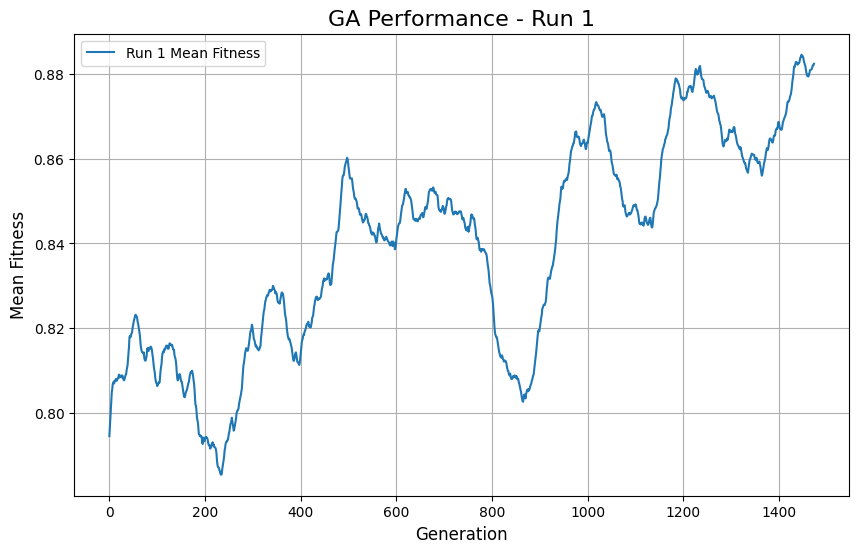


Run Number: 2
Best initial fitness: 0.6000
Terminated due to fitness convergence at generation 1969

Your outfit selection is ready! Here's your personalized outfit plan

Top: Hoodie - price: 60.0 - dress_code: Casual - color: Bright - comfort_level: 4
Bottom: Leggings - price: 60.0 - dress_code: Casual - color: Dark - comfort_level: 5
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


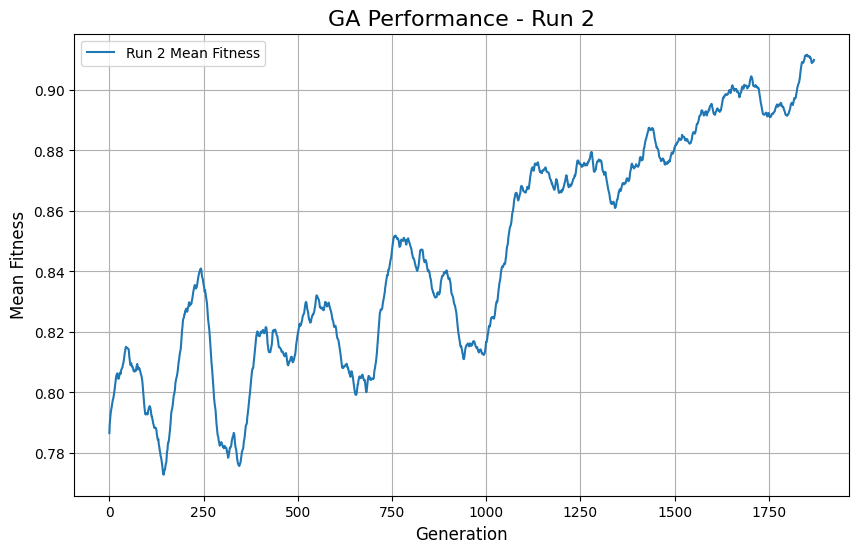


Run Number: 3
Best initial fitness: 0.8300
Terminated due to reaching the maximum number of generations: 2000

Your outfit selection is ready! Here's your personalized outfit plan

Top: T-shirt - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Bottom: Jeans - price: 0.0 - dress_code: Casual - color: Dark - comfort_level: 4
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Tote Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 4

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


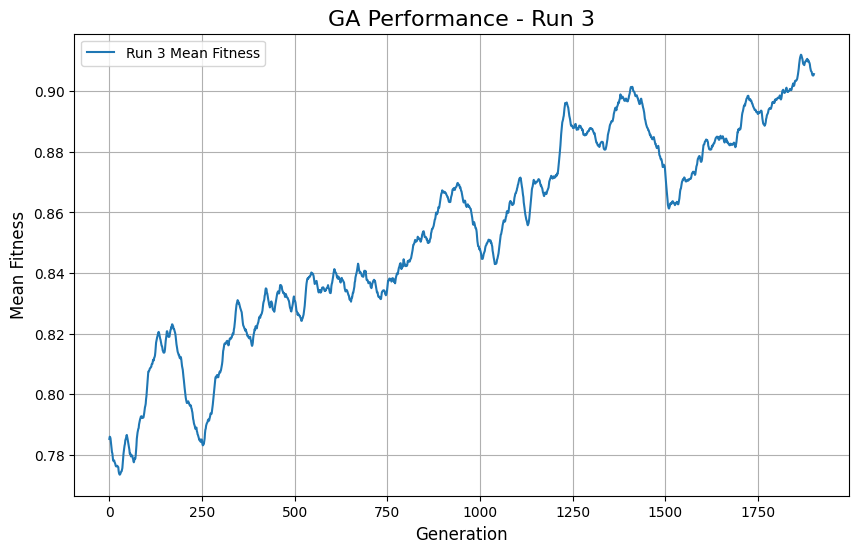


Run Number: 4
Best initial fitness: 0.7000
Terminated due to reaching the maximum number of generations: 2000

Your outfit selection is ready! Here's your personalized outfit plan

Top: Hoodie - price: 60.0 - dress_code: Casual - color: Bright - comfort_level: 4
Bottom: Jeans - price: 0.0 - dress_code: Casual - color: Dark - comfort_level: 4
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


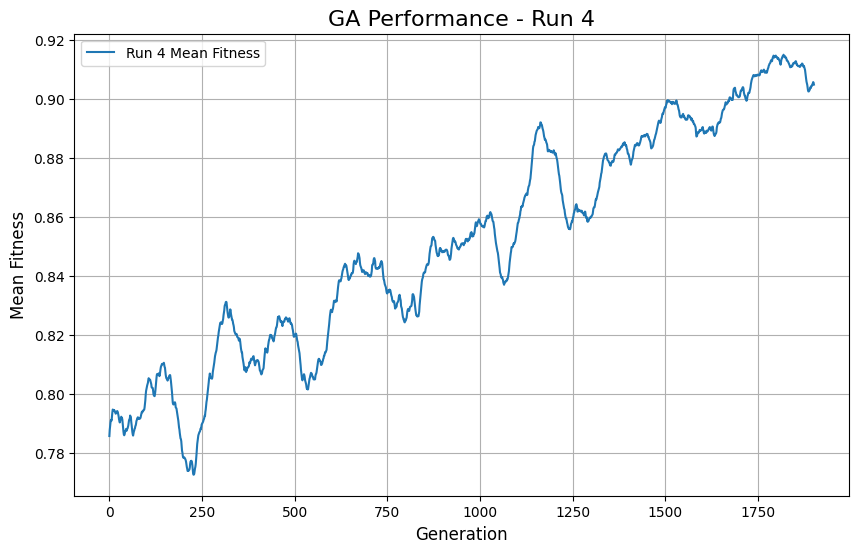


Run Number: 5
Best initial fitness: 0.8400
Terminated due to fitness convergence at generation 1864

Your outfit selection is ready! Here's your personalized outfit plan

Top: T-shirt - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Bottom: Leggings - price: 60.0 - dress_code: Casual - color: Dark - comfort_level: 5
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


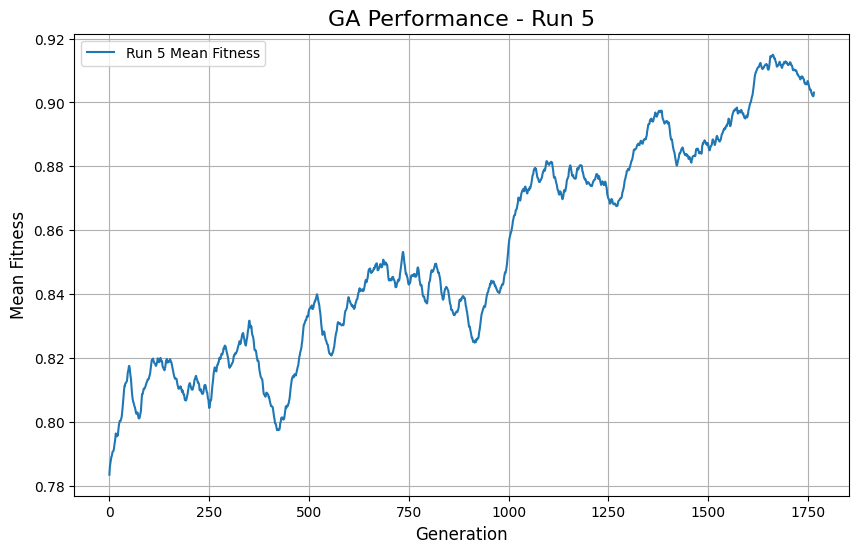


Run Number: 6
Best initial fitness: 0.9000
Terminated due to reaching the maximum number of generations: 2000

Your outfit selection is ready! Here's your personalized outfit plan

Top: T-shirt - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Bottom: Jeans - price: 0.0 - dress_code: Casual - color: Dark - comfort_level: 4
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


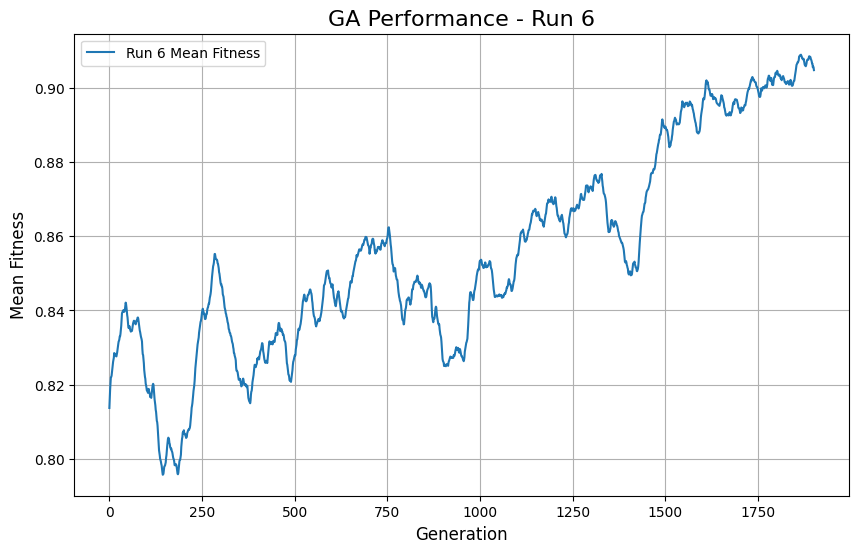


Run Number: 7
Best initial fitness: 0.8300
Terminated due to reaching the maximum number of generations: 2000

Your outfit selection is ready! Here's your personalized outfit plan

Top: T-shirt - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Bottom: Leggings - price: 60.0 - dress_code: Casual - color: Dark - comfort_level: 5
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Tote Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 4

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


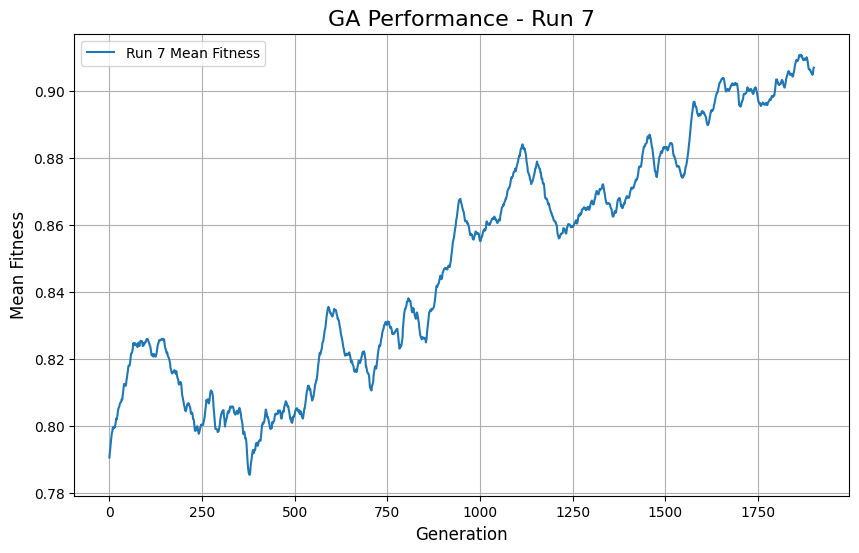


Run Number: 8
Best initial fitness: 0.7000
Terminated due to fitness convergence at generation 1986

Your outfit selection is ready! Here's your personalized outfit plan

Top: Hoodie - price: 60.0 - dress_code: Casual - color: Bright - comfort_level: 4
Bottom: Jeans - price: 0.0 - dress_code: Casual - color: Dark - comfort_level: 4
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Tote Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 4

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


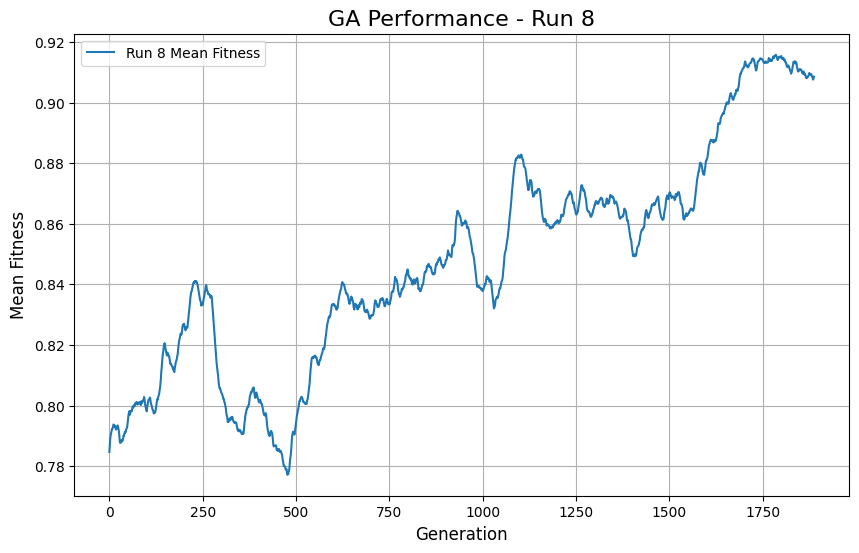


Run Number: 9
Best initial fitness: 0.7700
Terminated due to fitness convergence at generation 1791

Your outfit selection is ready! Here's your personalized outfit plan

Top: Hoodie - price: 60.0 - dress_code: Casual - color: Bright - comfort_level: 4
Bottom: Leggings - price: 60.0 - dress_code: Casual - color: Dark - comfort_level: 5
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


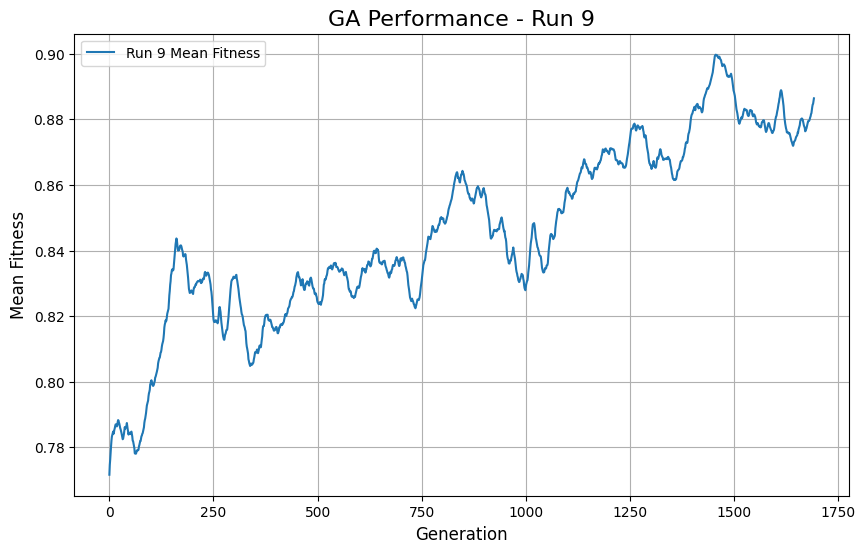


Run Number: 10
Best initial fitness: 0.6700
Terminated due to reaching the maximum number of generations: 2000

Your outfit selection is ready! Here's your personalized outfit plan

Top: Hoodie - price: 60.0 - dress_code: Casual - color: Bright - comfort_level: 4
Bottom: Leggings - price: 60.0 - dress_code: Casual - color: Dark - comfort_level: 5
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


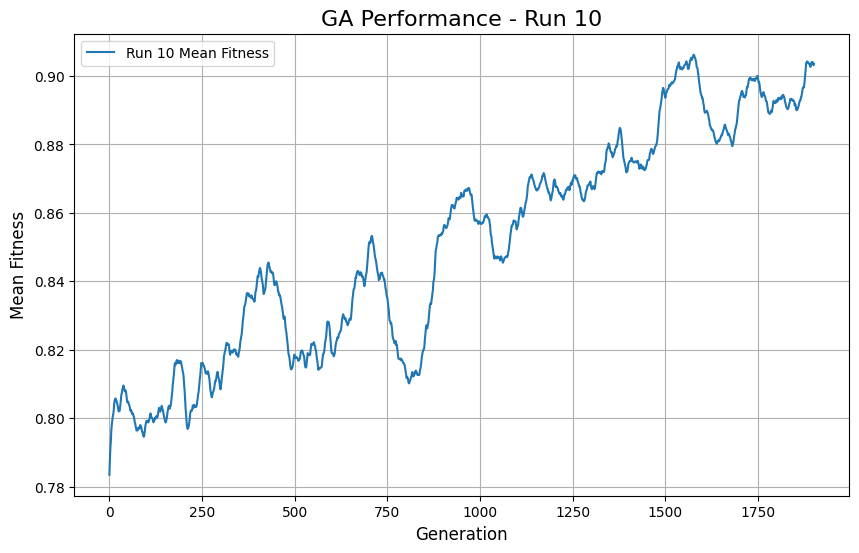


Run Number: 11
Best initial fitness: 0.7300
Terminated due to fitness convergence at generation 1525

Your outfit selection is ready! Here's your personalized outfit plan

Top: Hoodie - price: 60.0 - dress_code: Casual - color: Bright - comfort_level: 4
Bottom: Leggings - price: 60.0 - dress_code: Casual - color: Dark - comfort_level: 5
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


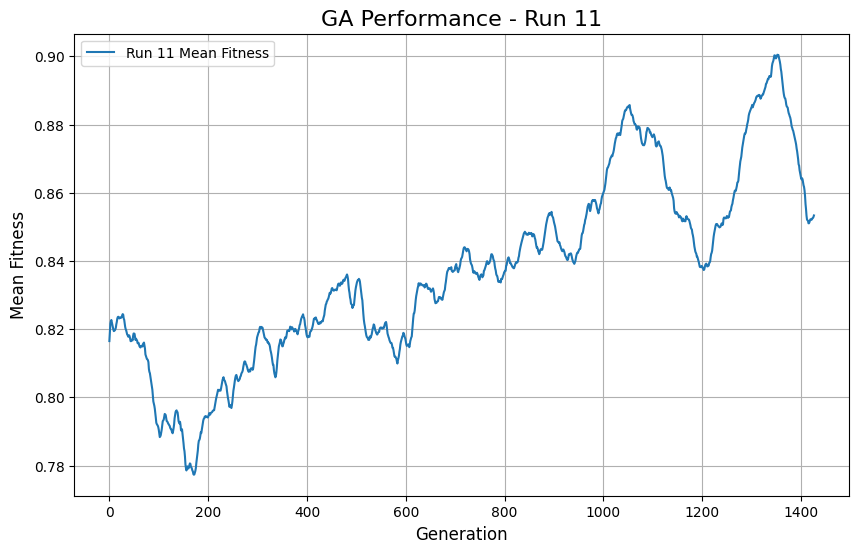


Run Number: 12
Best initial fitness: 0.8700
Terminated due to fitness convergence at generation 1733

Your outfit selection is ready! Here's your personalized outfit plan

Top: T-shirt - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Bottom: Leggings - price: 60.0 - dress_code: Casual - color: Dark - comfort_level: 5
Shoes: Running Shoes - price: 120.0 - dress_code: Sportswear - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9000
Hope you feel fabulous in your outfit!


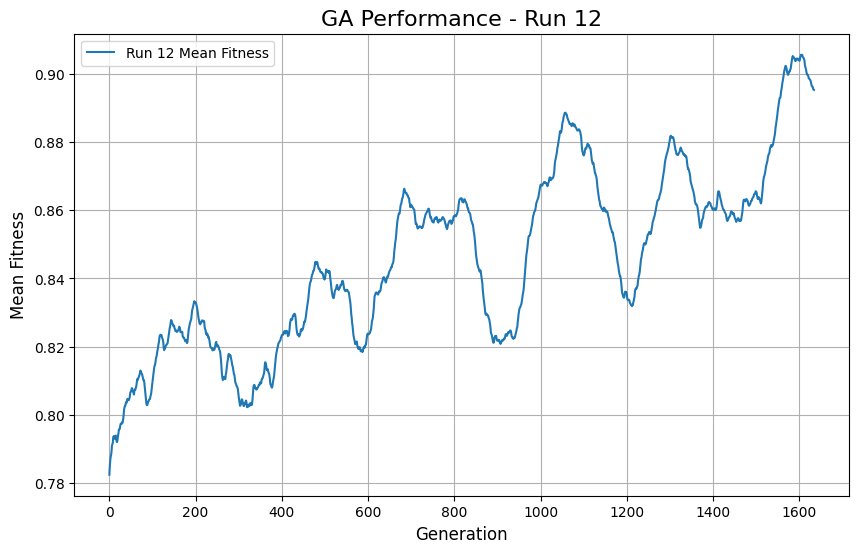


Run Number: 13
Best initial fitness: 0.7000
Terminated due to reaching the maximum number of generations: 2000

Your outfit selection is ready! Here's your personalized outfit plan

Top: Hoodie - price: 60.0 - dress_code: Casual - color: Bright - comfort_level: 4
Bottom: Jeans - price: 0.0 - dress_code: Casual - color: Dark - comfort_level: 4
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


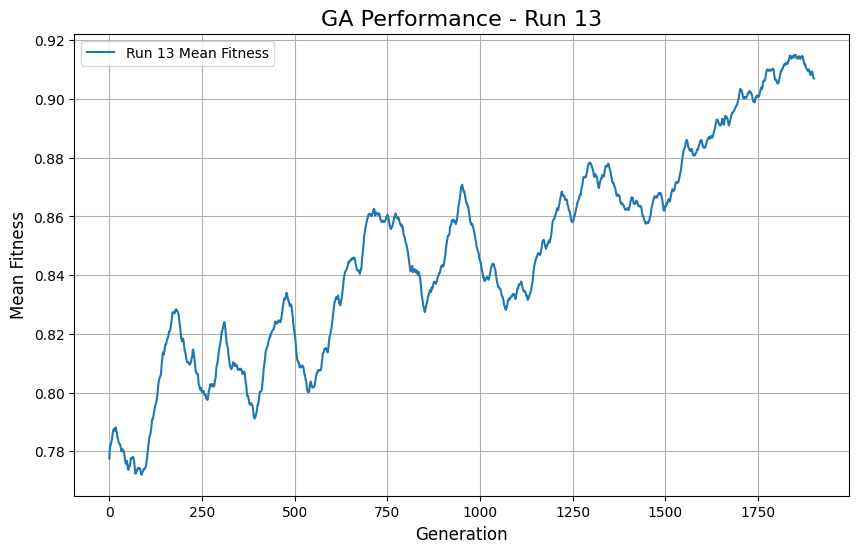


Run Number: 14
Best initial fitness: 0.7300
Terminated due to reaching the maximum number of generations: 2000

Your outfit selection is ready! Here's your personalized outfit plan

Top: Hoodie - price: 60.0 - dress_code: Casual - color: Bright - comfort_level: 4
Bottom: Jeans - price: 0.0 - dress_code: Casual - color: Dark - comfort_level: 4
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Tote Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 4

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


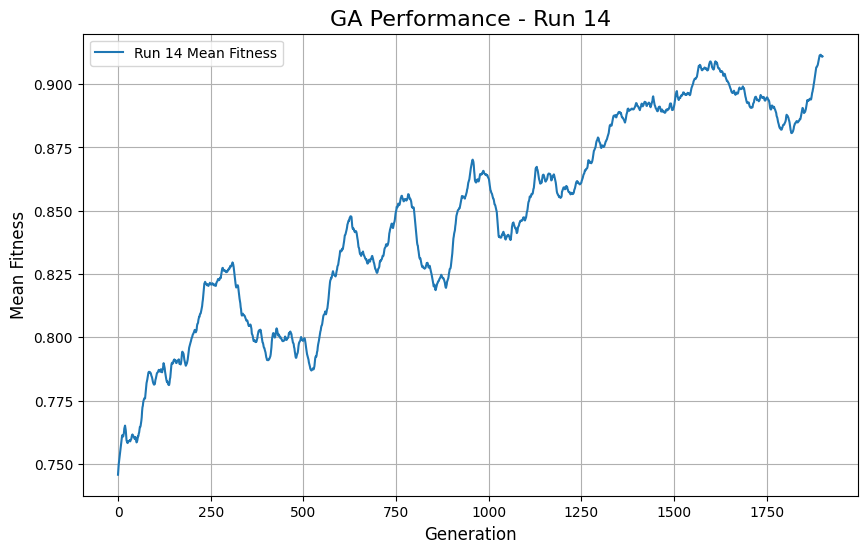


Run Number: 15
Best initial fitness: 0.8300
Terminated due to reaching the maximum number of generations: 2000

Your outfit selection is ready! Here's your personalized outfit plan

Top: T-shirt - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Bottom: Jeans - price: 0.0 - dress_code: Casual - color: Dark - comfort_level: 4
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


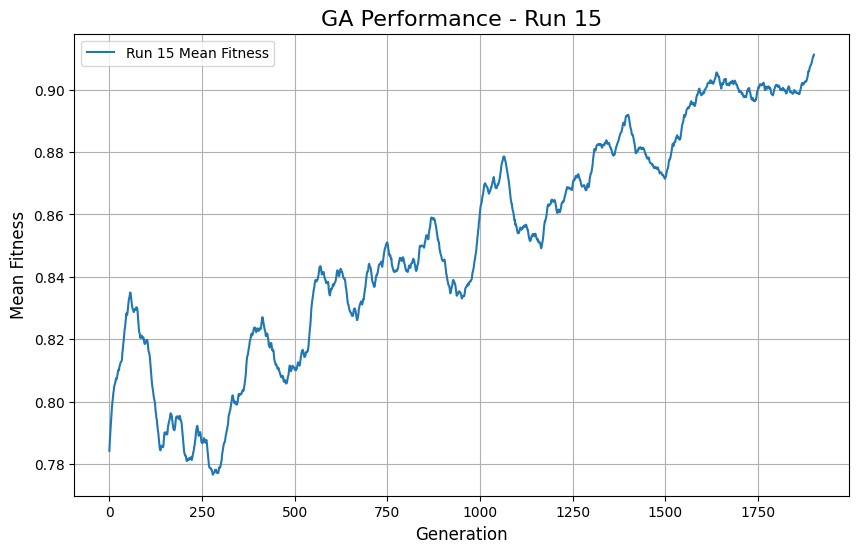


Run Number: 16
Best initial fitness: 0.7700
Terminated due to fitness convergence at generation 1967

Your outfit selection is ready! Here's your personalized outfit plan

Top: T-shirt - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Bottom: Leggings - price: 60.0 - dress_code: Casual - color: Dark - comfort_level: 5
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Tote Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 4

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


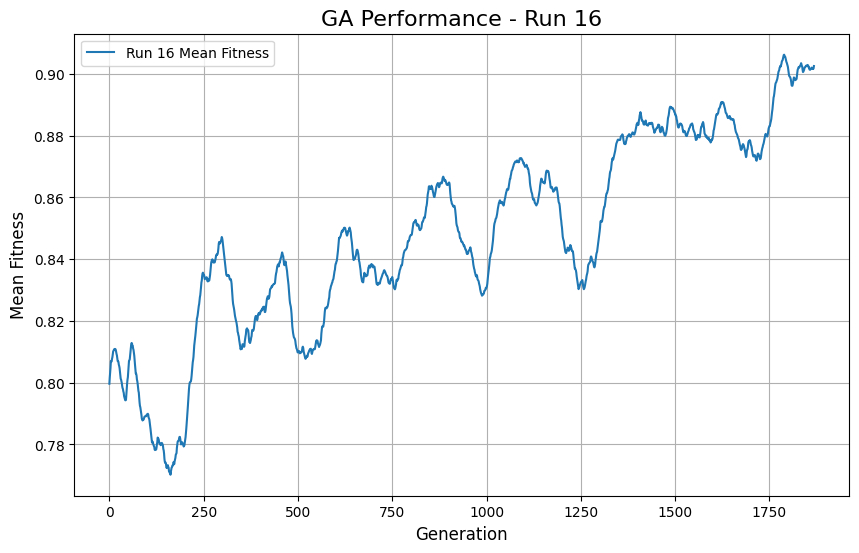


Run Number: 17
Best initial fitness: 0.6700
Terminated due to reaching the maximum number of generations: 2000

Your outfit selection is ready! Here's your personalized outfit plan

Top: Hoodie - price: 60.0 - dress_code: Casual - color: Bright - comfort_level: 4
Bottom: Jeans - price: 0.0 - dress_code: Casual - color: Dark - comfort_level: 4
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Tote Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 4

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


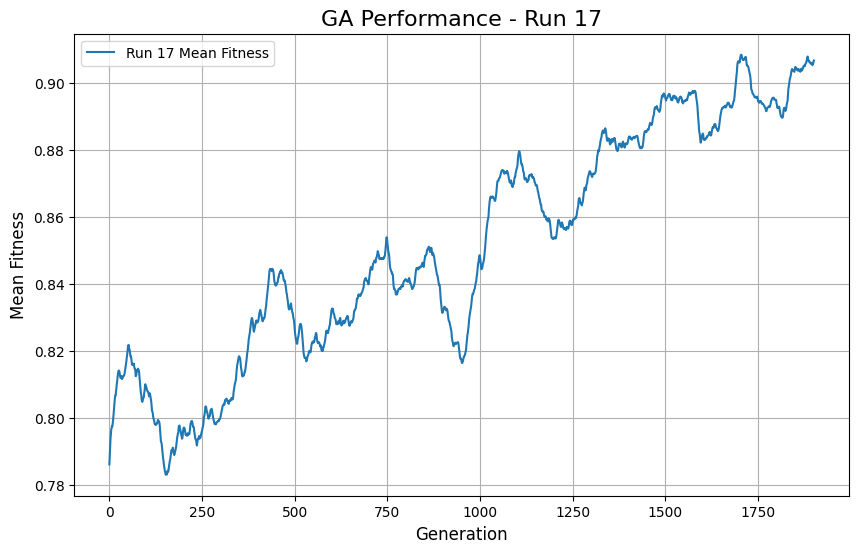


Run Number: 18
Best initial fitness: 0.7600
Terminated due to fitness convergence at generation 1476

Your outfit selection is ready! Here's your personalized outfit plan

Top: Hoodie - price: 60.0 - dress_code: Casual - color: Bright - comfort_level: 4
Bottom: Leggings - price: 60.0 - dress_code: Casual - color: Dark - comfort_level: 5
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Tote Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 4

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


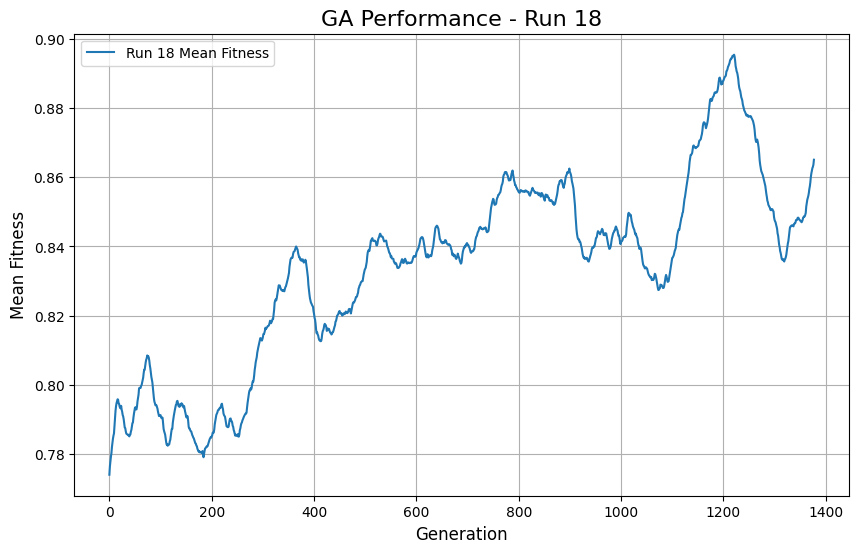


Run Number: 19
Best initial fitness: 0.6400
Terminated due to reaching the maximum number of generations: 2000

Your outfit selection is ready! Here's your personalized outfit plan

Top: Hoodie - price: 60.0 - dress_code: Casual - color: Bright - comfort_level: 4
Bottom: Jeans - price: 0.0 - dress_code: Casual - color: Dark - comfort_level: 4
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Canvas Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


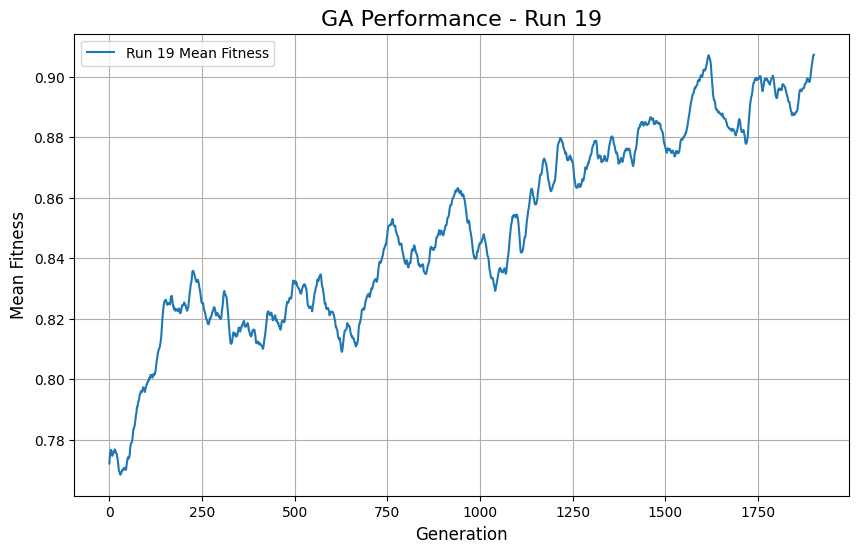


Run Number: 20
Best initial fitness: 0.7700
Terminated due to fitness convergence at generation 1769

Your outfit selection is ready! Here's your personalized outfit plan

Top: T-shirt - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Bottom: Jeans - price: 0.0 - dress_code: Casual - color: Dark - comfort_level: 4
Shoes: Sandals - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Neck: Casual Scarf - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 5
Purse: Tote Bag - price: 0.0 - dress_code: Casual - color: Bright - comfort_level: 4

Overall Fitness: 0.9700
Hope you feel fabulous in your outfit!


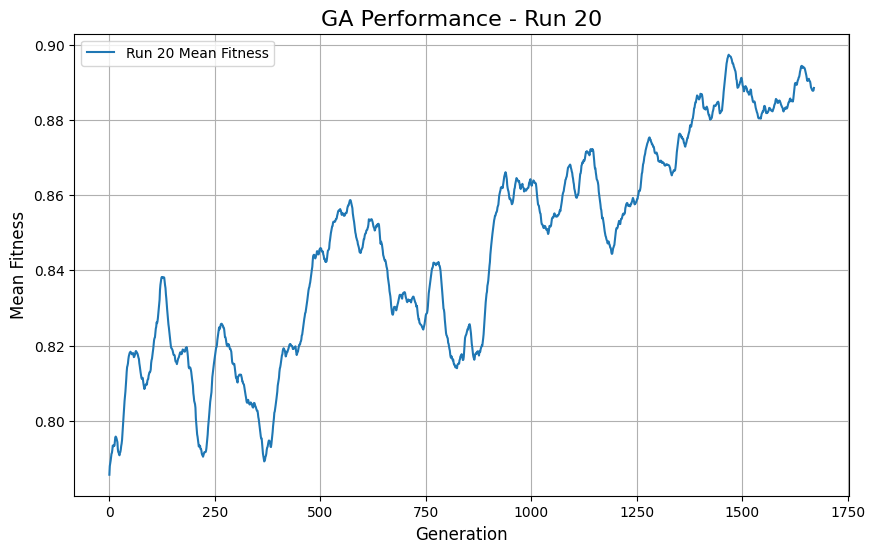

In [ ]:
# Main Genetic Algorithm loop
for run in range(1, Runs + 1):
    print(f"\n\033[94mRun Number:\033[0m {run}")
    # Create initial population
    population = create_initial_population(population_size)
    # Calculate fitness for each individual
    fitnesses = [fitness(ind, user_preferences) for ind in population]

    # Initialize tracking variables for this run
    best_fitness_generation = 0
    mean_fitness_history = []

    best_initial = max(fitnesses)

    # Track the mean fitness for the generation
    mean_fitness = sum(fitnesses) / len(fitnesses)
    mean_fitness_history.append(mean_fitness)

    # Track best fitness for plotting
    fitness_history = []
    fitness_history.append(best_initial)

    print(f"\033[94mBest initial fitness:\033[0m {best_initial:.4f}")

    # Genetic Algorithm process
    for generation in range(1, generations + 1):
        # Perform crossover
        new_population = crossover(population, fitnesses)

        # Perform mutation
        mutation_rate = max(0.2 - (generation / generations * 0.1), 0.05) # Decay mutation rate over generations
        new_population = mutate(new_population, mutation_rate, inventory=inventory)

        # Calculate fitness for the new population
        fitnesses = [fitness(ind, user_preferences) for ind in new_population]

        # Update population for next generation
        population = new_population[:population_size]

        # Track mean fitness for this generation
        mean_fitness = sum(fitnesses) / len(fitnesses)
        mean_fitness_history.append(mean_fitness)

        # Update global best fitness
        current_best_fitness = max(fitnesses)
        if current_best_fitness > global_best_fitness:
            global_best_fitness = current_best_fitness

        # Track the best fitness in this generation
        current_best_fitness = max(fitnesses)


        error = abs(optimal_solution - current_best_fitness)
        fitness_variance = sum((f - mean_fitness) ** 2 for f in fitnesses) / len(fitnesses)

        if error < min_error_threshold:
            print(f"Terminated due to reaching minimum error at generation {generation}")
            break
        if fitness_variance < fitness_variance_threshold:
            print(f"Terminated due to fitness convergence at generation {generation}")
            break
        if generation == generations:
            print(f"Terminated due to reaching the maximum number of generations: {generation}")
            break

    def print_perfect_fit(best_outfit, best_fitness):
        """Print the final outfit selection with styling and fitness value."""
        print("\nYour outfit selection is ready! Here's your personalized outfit plan\n")
        
        # Print each item with color coding
        for category, item in best_outfit.items():
            print(f"\033[91m{category.capitalize()}:\033[0m {item['name']} - price: {item['price']} - dress_code: {item['dress_code']} - "
                f"color: {item['color']} - comfort_level: {item['comfort_level']}")
        
        print(f"\n\033[94mOverall Fitness:\033[0m {best_fitness:.4f}")
        print("Hope you feel \033[94mfabulous\033[0m in your outfit!")

    # Get the best outfit and its fitness
    best_outfit = max(population, key=lambda x: fitness(x, user_preferences))
    best_fitness = fitness(best_outfit, user_preferences)

    # Append the best fitness of this run to the list
    best_fitness_values.append(best_fitness)

    # Print the perfect fit
    print_perfect_fit(best_outfit, best_fitness)


    # Store results for this run
    all_mean_fitness_histories.append(mean_fitness_history)

    # Plot the mean fitness history for this run
    smoothed_mean_fitness = np.convolve(mean_fitness_history, np.ones(100) / 100, mode='valid')
    smoothed_generations = range(len(smoothed_mean_fitness))

    plt.figure(figsize=(10, 6))
    plt.plot(smoothed_generations, smoothed_mean_fitness, label=f'Run {run} Mean Fitness')
    plt.title(f'GA Performance - Run {run}', fontsize=16)
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Mean Fitness', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

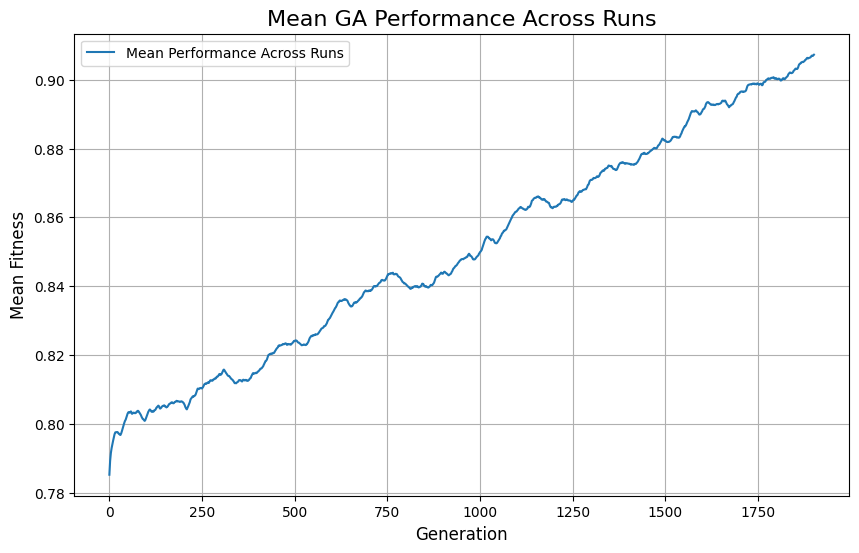



Mean Best Fitness across 20 runs: 0.9665


In [23]:
# Normalize the lengths of fitness histories
max_generations = max(len(history) for history in all_mean_fitness_histories)

# Pad each fitness history with NaN to make them the same length
padded_histories = [
    np.pad(history, (0, max_generations - len(history)), constant_values=np.nan)
    for history in all_mean_fitness_histories
]

# Calculate the mean performance across runs, ignoring NaN values
mean_performance = np.nanmean(np.array(padded_histories), axis=0)

# Smooth the mean performance
smoothed_mean_performance = np.convolve(mean_performance, np.ones(100) / 100, mode='valid')
smoothed_generations = range(len(smoothed_mean_performance))

# Plot the smoothed mean performance across all runs
plt.figure(figsize=(10, 6))
plt.plot(smoothed_generations, smoothed_mean_performance, label='Mean Performance Across Runs')
plt.title('Mean GA Performance Across Runs', fontsize=16)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Mean Fitness', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Calculate and display the mean best fitness across all runs
mean_best_fitness = np.mean(best_fitness_values)
print(f"\n\n\033[94mMean Best Fitness across {Runs} runs:\033[0m {mean_best_fitness:.4f}")